## Feature Selection

### <a href=#s2>Baseline</a>
### <a href=#s3>Correlations, basic OLS</a>
### <a href=#s4> Lasso Regularization</a>

In [1]:
import pandas as pd
import re
import numpy as np
import pipeline as p
import datetime as dt

%load_ext autoreload
%autoreload 2

from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import fitting as f

In [55]:
%reload_ext autoreload

In [77]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [81]:
df = p.open_pkl('Data/model_df3.pkl')

In [82]:
len(df)

2540

In [6]:
train_df = p.open_pkl('Data/train_df.pkl')
test_df = p.open_pkl('Data/test_df.pkl')

In [7]:
train_df.reset_index(inplace=True, drop=True)

In [8]:
target = 'elo_delta1'

In [ ]:
# X_train = train_df.drop(columns=target)
# y_train = train_df[[target]]

# X_test = test_df.drop(columns=target)
# y_test = test_df[[target]]

In [79]:
all_cols = p.open_pkl('Data/all_cols.pkl')

In [80]:
len(all_cols)

53

In [83]:
all_cols

['DefTO_SA1',
 'DefTO_SA2',
 'FirstD_SA1',
 'FirstD_SA2',
 'FourthDAtt_SA1',
 'FourthDAtt_SA2',
 'Fumbles_SA1',
 'Fumbles_SA2',
 'INT_SA1',
 'INT_SA2',
 'PassAtt_SA1',
 'PassAtt_SA2',
 'PassCmp_SA1',
 'PassCmp_SA2',
 'PassCompPct_SA1',
 'PassCompPct_SA2',
 'PassRating_SA1',
 'PassRating_SA2',
 'PassTDs_SA1',
 'PassTDs_SA2',
 'PassY_SA1',
 'PassY_SA2',
 'PenY_SA1',
 'PenY_SA2',
 'Penalies_SA1',
 'Penalies_SA2',
 'PtsOpp_SA1',
 'PtsOpp_SA2',
 'PtsTm_SA1',
 'PtsTm_SA2',
 'RushAtt_SA1',
 'RushAtt_SA2',
 'RushTDs_SA1',
 'RushTDs_SA2',
 'RushY_SA1',
 'RushY_SA2',
 'SacksO_SA1',
 'SacksO_SA2',
 'TO_SA1',
 'TO_SA2',
 'ThirdDAtt_SA1',
 'ThirdDAtt_SA2',
 'ThirdDConv_SA1',
 'ThirdDConv_SA2',
 'TimePossMins1',
 'TimePossMins2',
 'TotY_SA1',
 'TotY_SA2',
 'WinPct1',
 'WinPct2',
 'elo1',
 'elo2',
 'playoff']

### 2. Baseline <a name=s2 />
We know that FivethrityEight's Elo model includes only game Location, and Elo for Team & Opponent entering the week. We'll use this as our baseline

In [10]:
simple_cols = ['elo1','elo2']

In [11]:
fit = f.simple_OLS(train_df, simple_cols, target)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elo_delta1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.755
Date:                Sat, 13 Oct 2018   Prob (F-statistic):            0.00322
Time:                        16:55:35   Log-Likelihood:                -8720.7
No. Observations:                1905   AIC:                         1.745e+04
Df Residuals:                    1902   BIC:                         1.746e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8072     10.874      2.649      0.008       7.481      50.133
elo1          -0.0174      0.005     -3.346      0.001      -0.028      -0.007
elo2          -0.0019      0.005     -0.354      0.724      -0.012       0.009
==============================================================================
Omnibus:                       47.206   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.241
Skew:                          -0.397   Prob(JB):                     1.23e-11
Kurtosis:                       3.052   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

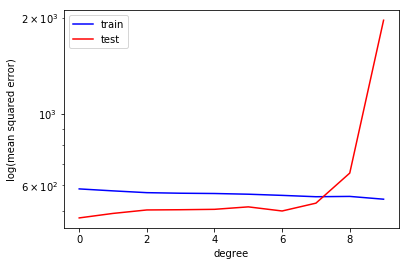

In [12]:
f.pick_degrees(train_df, simple_cols, target, max_deg=10)

In [13]:
f.assess_model_poly(train_df, simple_cols, target, 6)

[-0.0049958365774964699, -0.083475840248391942, 0.024065120938209009, -0.099026766175347669, 0.012233210715258515]
[566.94833297085961, 560.82757114613855, 601.34304330418536, 613.84786475482963, 521.13286111943899]


(-0.030240022269553711, 572.81993465909045)

### 2. Simple OLS, P-values  <a name=s2 />

In [15]:
fit2a = f.simple_OLS(train_df, all_cols, target)
fit2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elo_delta1   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     24.54
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          4.37e-172
Time:                        16:56:06   Log-Likelihood:                -8227.3
No. Observations:                1905   AIC:                         1.656e+04
Df Residuals:                    1852   BIC:                         1.685e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.7688     43.723      1.093      0.275     -37.983     133.520
DefTO_SA1           0.1073      0.872      0.123      0.902      -1.603       1.817
DefTO_SA2           0.8124      0.863      0.941      0.347      -0.880       2.505
FirstD_SA1          0.1294      0.634      0.204      0.838      -1.114       1.373
FirstD_SA2         -0.3786      0.600     -0.631      0.528      -1.555       0.798
FourthDAtt_SA1      2.5342      1.144      2.216      0.027       0.291       4.777
FourthDAtt_SA2     -0.9810      1.148     -0.855      0.393      -3.232       1.270
Fumbles_SA1        -0.2373      0.932     -0.255      0.799      -2.066       1.591
Fumbles_SA2        -0.3245      0.929     -0.349      0.727      -2.146       1.497
INT_SA1            -0.7311      2.755     -0.265      0.791      -6.134       4.672
INT_SA2             0.3259      2.811      0.116      0.908      -5.187       5.839
PassAtt_SA1        -0.2991      0.866     -0.346      0.730      -1.997       1.399
PassAtt_SA2         0.4063      0.899      0.452      0.651      -1.356       2.169
PassCmp_SA1         0.4107      1.373      0.299      0.765      -2.282       3.104
PassCmp_SA2        -0.7456      1.413     -0.528      0.598      -3.517       2.026
PassCompPct_SA1    -0.1869      0.553     -0.338      0.735      -1.272       0.898
PassCompPct_SA2     0.2805      0.562      0.499      0.618      -0.823       1.384
PassRating_SA1     -0.0278      0.183     -0.152      0.879      -0.387       0.332
PassRating_SA2      0.0334      0.193      0.174      0.862      -0.344       0.411
PassTDs_SA1        -0.5856      2.721     -0.215      0.830      -5.922       4.751
PassTDs_SA2        -2.1420      2.758     -0.777      0.437      -7.551       3.267
PassY_SA1          -0.9592      1.556     -0.617      0.538      -4.010       2.092
PassY_SA2          -0.0074      0.023     -0.326      0.744      -0.052       0.037
PenY_SA1            0.0874      0.075      1.160      0.246      -0.060       0.235
PenY_SA2            0.0378      0.079      0.475      0.635      -0.118       0.194
Penalies_SA1       -0.3909      0.711     -0.550      0.583      -1.785       1.004
Penalies_SA2       -0.8511      0.738     -1.153      0.249      -2.299       0.597
PtsOpp_SA1          0.5004      0.152      3.283      0.001       0.202       0.799
PtsOpp_SA2         -0.7656      0.146     -5.237      0.000      -1.052      -0.479
PtsTm_SA1          -0.3197      0.249     -1.283      0.200      -0.808       0.169
PtsTm_SA2           1.0459      0.251      4.162      0.000       0.553       1.539
RushAtt_SA1        -0.6861      0.427     -1.607      0.108      -1.523       0.151
RushAtt_SA2        -0.1421      0.421     -0.338      0.736      -0.967       0.683
RushTDs_SA1        -0.4596      1.916     -0.240      0.810

In [17]:
f.assess_model_poly(train_df, all_cols, target, 1)

[0.39443920743075594, -3.9953067133379812e+20, 0.37218192148493223, 0.34629495006220912, 0.32040918015417608]
[341.61502900233302, 2.0680462607375864e+23, 386.8434688373643, 365.11890468347298, 358.54324338360328]


(-7.9906134266759627e+19, 4.1360925214751729e+22)

#### Get p-values. Select features whose p-values are less than 0.1. Run through Simple OLS

In [18]:
x_cols_02 = f.get_vars_low_pvals(fit2a)

In [19]:
x_cols_02

['FourthDAtt_SA1',
 'PtsOpp_SA1',
 'PtsOpp_SA2',
 'PtsTm_SA2',
 'TimePossMins1',
 'TimePossMins2',
 'WinPct1',
 'WinPct2',
 'elo1',
 'elo2',
 'playoff']

In [20]:
fit2b = f.simple_OLS(train_df, x_cols_02, target)
fit2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elo_delta1   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          4.79e-197
Time:                        16:57:27   Log-Likelihood:                -8248.7
No. Observations:                1905   AIC:                         1.652e+04
Df Residuals:                    1893   BIC:                         1.659e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         54.9918     19.547      2.813      0.005      16.655      93.328
FourthDAtt_SA1     2.7850      1.031      2.701      0.007       0.763       4.807
PtsOpp_SA1         0.4776      0.114      4.180      0.000       0.253       0.702
PtsOpp_SA2        -0.9578      0.127     -7.516      0.000      -1.208      -0.708
PtsTm_SA2          0.8077      0.123      6.561      0.000       0.566       1.049
TimePossMins1      0.6570      0.217      3.032      0.002       0.232       1.082
TimePossMins2     -0.9166      0.211     -4.353      0.000      -1.330      -0.504
WinPct1            0.5079      0.035     14.483      0.000       0.439       0.577
WinPct2           -0.5733      0.038    -15.120      0.000      -0.648      -0.499
elo1              -0.1047      0.007    -15.053      0.000      -0.118      -0.091
elo2               0.0684      0.008      9.048      0.000       0.054       0.083
playoff          -10.9779      2.282     -4.811      0.000     -15.453      -6.503
==============================================================================
Omnibus:                       63.324   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.142
Skew:                          -0.176   Prob(JB):                     3.70e-31
Kurtosis:                       4.281   Cond. No.                     9.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

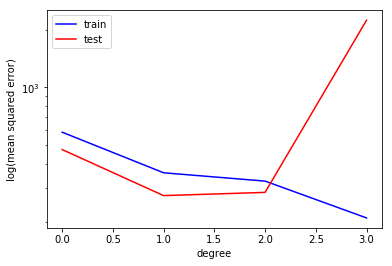

In [22]:
f.pick_degrees(train_df, x_cols_02, target, max_deg=4)

In [23]:
f.assess_model_poly(train_df, x_cols_02, target, 2)

[0.4242575028746951, 0.40081548787900223, 0.39968149122099594, 0.36814039447794789, 0.31761513670800456]
[324.79363305352479, 310.14922725380251, 369.8990237627732, 352.91740075114558, 360.01734422500704]


(0.38210200263212918, 343.55532580925058)

### 3. Correlations. Simple OLS 
<a name=s3 />

In [24]:
dfc = train_df.corr()

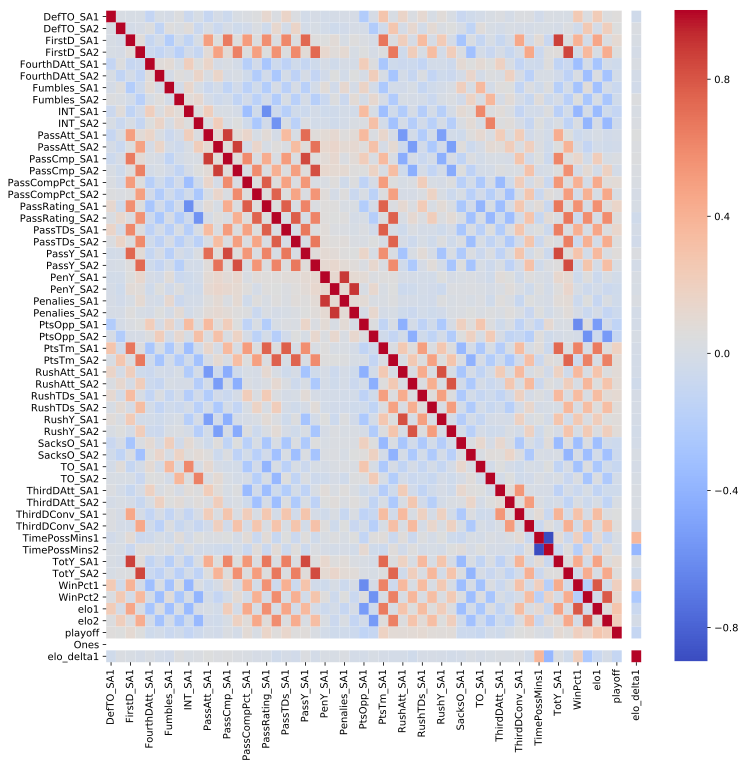

In [98]:
plt.figure(figsize=(12,12))
sns.heatmap(dfc, cmap='coolwarm')

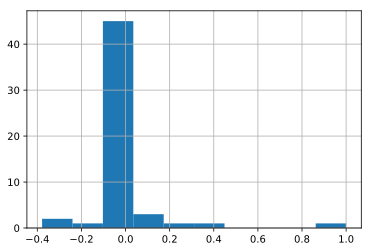

In [99]:
dfc[target].hist()

Most are ~0. But some aren't

In [25]:
corr_cols = list(dfc.loc[(abs(dfc[target]) > 0.1) & (dfc[target] < 1)][target].index)

In [26]:
corr_cols

['TimePossMins1', 'TimePossMins2', 'WinPct1', 'WinPct2', 'playoff']

In [27]:
corr_cols.pop()

'playoff'

In [28]:
fit3 = f.simple_OLS(train_df, corr_cols, target)
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elo_delta1   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           1.80e-86
Time:                        16:58:09   Log-Likelihood:                -8523.3
No. Observations:                1905   AIC:                         1.706e+04
Df Residuals:                    1900   BIC:                         1.708e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.6112     14.584      1.139      0.255     -11.990      45.213
TimePossMins1     0.6428      0.250      2.574      0.010       0.153       1.133
TimePossMins2    -1.1078      0.242     -4.569      0.000      -1.583      -0.632
WinPct1           0.1062      0.021      4.940      0.000       0.064       0.148
WinPct2          -0.1728      0.022     -7.933      0.000      -0.215      -0.130
==============================================================================
Omnibus:                      114.964   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.150
Skew:                          -0.244   Prob(JB):                     1.14e-80
Kurtosis:                       5.098   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Worse R2

### 4. Lasso Regularization to choose features <a name=s4 />

In [29]:
lcv_r, lcv_mse, lcv_a, lcv_coefs = f.assess_model_lassocv(train_df, all_cols, target, 1, return_coefs=True)

[0.40212215292753933, 0.43747084796351315, 0.37109286624985932, 0.35882823821996868, 0.33287856499554058]
[337.2808487170285, 291.17572013714135, 387.51451339518832, 358.11859094155068, 351.96455874946497]
[0.18171871853849964, 0.22546472039947604, 0.25000670750946641, 0.23915111694620211, 0.24874241169550682]


In [30]:
avg_lcv_coefs = np.mean(lcv_coefs, axis=0)

In [164]:
len(avg_lcv_coefs)

54

In [165]:
len(all_cols)

53

In [31]:
avg_lcv_coefs = avg_lcv_coefs[1:]

In [32]:
len(avg_lcv_coefs)

53

In [33]:
lasso_dict = dict(zip(all_cols, avg_lcv_coefs))
lasso_cols = [x for x,c in lasso_dict.items() if abs(c) != 0]

In [34]:
lasso_cols

['PenY_SA1',
 'RushY_SA1',
 'DefTO_SA1',
 'PassAtt_SA1',
 'PassRating_SA1',
 'elo1',
 'ThirdDAtt_SA1',
 'ThirdDAtt_SA2',
 'PtsOpp_SA1',
 'INT_SA2',
 'RushAtt_SA1',
 'TotY_SA1',
 'PtsTm_SA2',
 'RushTDs_SA2',
 'elo2',
 'PassTDs_SA1',
 'Penalies_SA2',
 'TimePossMins1',
 'TotY_SA2',
 'ThirdDConv_SA1',
 'RushY_SA2',
 'DefTO_SA2',
 'PtsTm_SA1',
 'FirstD_SA2',
 'PassAtt_SA2',
 'playoff',
 'PtsOpp_SA2',
 'RushTDs_SA1',
 'Fumbles_SA2',
 'WinPct1',
 'INT_SA1',
 'PassCompPct_SA1',
 'TO_SA1',
 'TO_SA2',
 'TimePossMins2',
 'PassTDs_SA2',
 'PassY_SA2',
 'FourthDAtt_SA1',
 'FourthDAtt_SA2',
 'PassCompPct_SA2',
 'ThirdDConv_SA2',
 'SacksO_SA2',
 'SacksO_SA1',
 'WinPct2']

In [35]:
fit4 = f.simple_OLS(train_df, lasso_cols, target)
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elo_delta1   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     29.74
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          3.45e-178
Time:                        16:58:29   Log-Likelihood:                -8228.2
No. Observations:                1905   AIC:                         1.654e+04
Df Residuals:                    1861   BIC:                         1.679e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.5494     28.006      1.841      0.066      -3.377     106.476
PenY_SA1            0.0500      0.035      1.436      0.151      -0.018       0.118
RushY_SA1           0.0350      0.040      0.880      0.379      -0.043       0.113
DefTO_SA1           0.0644      0.862      0.075      0.940      -1.625       1.754
PassAtt_SA1         0.0152      0.276      0.055      0.956      -0.527       0.557
PassRating_SA1     -0.0517      0.154     -0.335      0.738      -0.354       0.251
elo1               -0.0976      0.008    -12.173      0.000      -0.113      -0.082
ThirdDAtt_SA1      -0.0214      0.845     -0.025      0.980      -1.678       1.635
ThirdDAtt_SA2       0.3379      0.754      0.448      0.654      -1.140       1.816
PtsOpp_SA1          0.5034      0.152      3.320      0.001       0.206       0.801
INT_SA2            -0.2070      1.412     -0.147      0.883      -2.976       2.562
RushAtt_SA1        -0.6125      0.280     -2.190      0.029      -1.161      -0.064
TotY_SA1            0.0123      0.030      0.409      0.683      -0.047       0.071
PtsTm_SA2           1.0547      0.250      4.217      0.000       0.564       1.545
RushTDs_SA2        -0.8884      1.953     -0.455      0.649      -4.719       2.942
elo2                0.0704      0.008      8.813      0.000       0.055       0.086
PassTDs_SA1        -0.2787      2.503     -0.111      0.911      -5.187       4.629
Penalies_SA2       -0.5187      0.329     -1.575      0.115      -1.165       0.127
TimePossMins1       0.6303      0.219      2.877      0.004       0.201       1.060
TotY_SA2           -0.0022      0.015     -0.145      0.885      -0.032       0.028
ThirdDConv_SA1      0.6598      0.752      0.877      0.381      -0.816       2.136
RushY_SA2           0.0023      0.021      0.111      0.912      -0.039       0.044
DefTO_SA2           0.7675      0.853      0.900      0.368      -0.905       2.440
PtsTm_SA1          -0.3087      0.247     -1.251      0.211      -0.792       0.175
FirstD_SA2         -0.5473      0.401     -1.364      0.173      -1.334       0.239
PassAtt_SA2         0.0432      0.241      0.179      0.858      -0.430       0.517
playoff           -11.1378      2.309     -4.824      0.000     -15.666      -6.610
PtsOpp_SA2         -0.7730      0.143     -5.393      0.000      -1.054      -0.492
RushTDs_SA1        -0.4175      1.885     -0.222      0.825      -4.114       3.279
Fumbles_SA2        -0.4068      0.918     -0.443      0.658      -2.207       1.393
WinPct1             0.5676      0.040     14.278      0.000       0.490       0.646
INT_SA1            -1.1024      2.381     -0.463      0.643      -5.772       3.568
PassCompPct_SA1    -0.0303      0.190     -0.160      0.873      -0.403       0.342
TO_SA1              0.5924      0.969      0.611      0.541

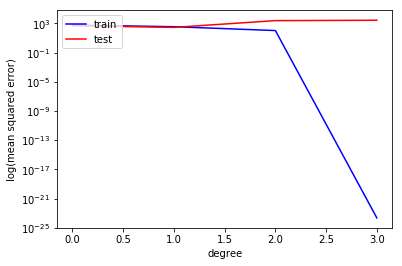

In [36]:
f.pick_degrees(train_df, lasso_cols, target, max_deg=4)

In [37]:
# maybe come back & run this. It was taking a while
lcv_r, lcv_mse, lcv_a2 = f.assess_model_lassocv(train_df, lasso_cols, target, 2, False)

KeyboardInterrupt: 

In [39]:
x_cols_03 = f.get_vars_low_pvals(fit4, 0.2)

In [40]:
x_cols_03

['PenY_SA1',
 'elo1',
 'PtsOpp_SA1',
 'RushAtt_SA1',
 'PtsTm_SA2',
 'elo2',
 'Penalies_SA2',
 'TimePossMins1',
 'FirstD_SA2',
 'playoff',
 'PtsOpp_SA2',
 'WinPct1',
 'TimePossMins2',
 'FourthDAtt_SA1',
 'WinPct2']

### 5. Elastic Net

In [41]:
r, m, a, l, elas_coefs = f.assess_model_elasticnetcv(train_df, all_cols, target, 1, True)

[0.40192144315243505, 0.43777038240048621, 0.37153698331345009, 0.35861416727231604, 0.33269167455245829]
[337.39407512878546, 291.02067545176675, 387.24086121579325, 358.23815763288781, 352.0631597070755]
[0.17118331828316635, 0.21239308368549584, 0.23551221430967928, 0.2252859919948369, 0.23432121783740764]
[0.98999999999999999, 0.98999999999999999, 0.98999999999999999, 0.98999999999999999, 0.98999999999999999]


In [42]:
avg_elas_coefs = np.mean(elas_coefs, axis=0)

In [43]:
avg_elas_coefs = avg_elas_coefs[1:]

In [44]:
elas_dict = dict(zip(all_cols, avg_elas_coefs))
elas_cols = [x for x,c in lasso_dict.items() if abs(c) != 0]

In [45]:
elas_cols

['PenY_SA1',
 'RushY_SA1',
 'DefTO_SA1',
 'PassAtt_SA1',
 'PassRating_SA1',
 'elo1',
 'ThirdDAtt_SA1',
 'ThirdDAtt_SA2',
 'PtsOpp_SA1',
 'INT_SA2',
 'RushAtt_SA1',
 'TotY_SA1',
 'PtsTm_SA2',
 'RushTDs_SA2',
 'elo2',
 'PassTDs_SA1',
 'Penalies_SA2',
 'TimePossMins1',
 'TotY_SA2',
 'ThirdDConv_SA1',
 'RushY_SA2',
 'DefTO_SA2',
 'PtsTm_SA1',
 'FirstD_SA2',
 'PassAtt_SA2',
 'playoff',
 'PtsOpp_SA2',
 'RushTDs_SA1',
 'Fumbles_SA2',
 'WinPct1',
 'INT_SA1',
 'PassCompPct_SA1',
 'TO_SA1',
 'TO_SA2',
 'TimePossMins2',
 'PassTDs_SA2',
 'PassY_SA2',
 'FourthDAtt_SA1',
 'FourthDAtt_SA2',
 'PassCompPct_SA2',
 'ThirdDConv_SA2',
 'SacksO_SA2',
 'SacksO_SA1',
 'WinPct2']

### 6. Ridge CV

In [46]:
r, m, a, r_coefs = f.assess_model_ridgecv(train_df, all_cols, target, 1, True)

[0.39675468680716242, 0.43707126487935288, 0.3734217094714728, 0.34925403740042826, 0.32010000653531723]
[340.30879754872558, 291.38255189308461, 386.07954708718052, 363.46614289450383, 358.70635934814715]
[10.0, 10.0, 10.0, 10.0, 10.0]


In [50]:
r

0.19687661020062189

In [47]:
r, m, a = f.assess_model_ridgecv(train_df, all_cols, target, 2, False)

[0.26735366224826385, 0.23256535280099944, 0.16855460373056352, 0.13887434614966254, 0.17703508607362006]
[413.3078016124918, 397.23867687103973, 512.3127737934459, 480.97112842955011, 434.18554343776032]
[10.0, 10.0, 10.0, 10.0, 10.0]


In [188]:
avg_rdg_coefs = np.mean(r_coefs, axis=0)

## Compare models

In [63]:
f.compare_models(train_df, all_cols, target, 2)

Deg 6 [-21.474309761912732, 12555.205871640337]
Lasso CV [0.38047853407128418, 345.21084638807474, 0.22901673501783021]
Ridge CV [0.37532034101874673, 347.9886797543283, 10.0]
Elastic Net CV [0.38050693013822912, 345.1913858272618, 0.21573916522211717, 0.98999999999999999]


In [65]:
f.compare_models(train_df, lasso_cols, target, 1)

Deg 6 [0.3766958561037782, 347.25429176687214]
Lasso CV [0.38055367735278905, 345.16858754089128, 0.21698447282143971]
Ridge CV [0.37748212319832097, 346.82206749810689, 10.0]
Elastic Net CV [0.38038607829585469, 345.26908225182092, 0.21064049383510031, 0.98999999999999999]


In [67]:
f.compare_models(train_df, elas_cols, target, 1)

Deg 6 [0.3766958561037782, 347.25429176687214]
Lasso CV [0.38055367735278905, 345.16858754089128, 0.21698447282143971]
Ridge CV [0.37748212319832097, 346.82206749810689, 10.0]
Elastic Net CV [0.38038607829585469, 345.26908225182092, 0.21064049383510031, 0.98999999999999999]


In [68]:
f.compare_models(train_df, x_cols_02, target, 1)

Deg 6 [0.38548157523066318, 342.44446742424077]
Lasso CV [0.38558648834644271, 342.3922379202794, 0.024670929698149317]
Ridge CV [0.38550285629861858, 342.44888936892892, 10.0]
Elastic Net CV [0.38546964723081079, 342.46360705207269, 0.015429706571347021, 0.61999999999999988]


In [69]:
f.compare_models(train_df, x_cols_03, target, 1)

Deg 1 [0.38844787772306411, 340.63690671746815]
Lasso CV [0.38833054062519823, 340.72999557837085, 0.031650316747416543]
Ridge CV [0.38849755058283758, 340.62965111115312, 10.0]
Elastic Net CV [0.38828062204902308, 340.76282940371721, 0.022601705449505842, 0.67799999999999994]


In [70]:
p.pkl_this('Data/model_cols.pkl', x_cols_03)

In [71]:
f.assess_model_elasticnetcv(train_df, x_cols_03, target, 1)

[0.41440603669380044, 0.43938744533433194, 0.38350832328854095, 0.36299889254528361, 0.34110241238315853]
[330.35114098071944, 290.18365311689752, 379.86446534400028, 355.78912333346454, 347.62576424350442]
[0.012920262060662107, 0.016030617519339194, 0.047319891349817969, 0.018007772068503396, 0.018729984249206553]
[0.69999999999999996, 0.69999999999999996, 0.98999999999999999, 0.5, 0.5]


[0.38828062204902308,
 340.76282940371721,
 0.022601705449505842,
 0.67799999999999994]

In [72]:
f.assess_model_elasticnetcv(train_df, x_cols_03, target, 2)

[0.4164576058092897, 0.4339542276267182, 0.38316418486330323, 0.36128057881564146, 0.35003669485049732]
[329.1937892309229, 292.99598928285269, 380.07651355786192, 356.74886630459389, 342.91215346537234]
[0.16116965129576905, 0.18182983172227998, 0.24291900096948893, 0.15298802820285912, 0.12567543142467405]
[0.5, 0.98999999999999999, 0.98999999999999999, 0.98999999999999999, 0.10000000000000001]


[0.38897865839308998,
 340.3854623683207,
 0.17291638872301424,
 0.71399999999999997]

Report these scores (R2, MSE). 

Fit final model on entire data set

In [73]:
alpha = 0.1729
el_one = 0.714

In [78]:
model = make_pipeline(PolynomialFeatures(2), StandardScaler(), ElasticNet(alpha=alpha, l1_ratio=el_one))